In [2]:
from os import path

import numpy as np
import pandas as pd
import seaborn as sns
import plotnine as p9
import scipy.stats as stats
import matplotlib.pyplot as plt


root_path = path.abspath(path.join(path.abspath(""), "../.."))

In [3]:
rossi_table = pd.read_csv(f'{root_path}/data/nucleosome_position/rossi_et_al_features_positions.csv', low_memory=False)

### Table preprocessing

In [4]:
#### Formatting column names 
rossi_table = rossi_table.rename(columns={'Chrom':'Chromosome_Name', 'Strand':'strand', 'Feature class Level 1':'feature_type', 'Gene Class level 2':'gene_class', 'Husinga 2004 Gene Class':'husinga_classification', 'Systematic ID':'systematic_id', 'Common Name': 'common_name', 'Fragile vs Stable "-1" nucleosomes from Kubik Mol Cell 2015 (https://doi.org/10.1016/j.molcel.2015.10.002)':'nucleosome_stability', 'GO (Gene Ontology) description': 'GO_term'})

#### Formatting chromosome names
rossi_table['Chromosome_Name'] = rossi_table['Chromosome_Name'].apply(str.upper)

#### Replacing NA values in used columns
rossi_table['husinga_classification'] = rossi_table['husinga_classification'].astype('str')
rossi_table['systematic_id'] = rossi_table['systematic_id'].astype('str')
rossi_table['common_name'] = rossi_table['common_name'].astype('str')
rossi_table['TATA_type'] = rossi_table['TATA_type'].astype('str')
rossi_table['nucleosome_stability'] = rossi_table['nucleosome_stability'].astype('str')

#### Add NFR/NDR length
MINUS = rossi_table[rossi_table['strand'] == '-'].reset_index(drop=True)
MINUS['NFR/NDR_Length'] = MINUS['NFR/NDR_Start'] - MINUS['NFR/NDR_End']

PLUS = rossi_table[rossi_table['strand'] == '+'].reset_index(drop=True)
PLUS['NFR/NDR_Length'] = PLUS['NFR/NDR_End'] - PLUS['NFR/NDR_Start']

rossi_table = pd.concat([PLUS, MINUS]).reset_index(drop=True)

In [5]:
#### Keeping for our analysis
PROM = ['01_RP', '02_STM', '03_TFO', '04_UNB', '05_NoPIC', '06_tRNAprox']
NC_R = ['09_CUT', '10_SUT', '11_XUT', '12_NCR']
OTHERS = ['14_LTR', '15_tRNA', '16_ACS', '17_CEN', '18_MAT', '19_XEL', '20_YEL', '21_TEL', '22_RBD', '23_TMR']

In [6]:
#### Collect NFR information 
NFR_header = ['Chromosome_Name', 'strand', 'feature_type', 'gene_class', 'husinga_classification', 'systematic_id', 'common_name', 'NFR/NDR_Start', 'NFR/NDR_End', 'NFR/NDR_Length', 'nucleosome_stability', 'TATA_type']
PROM_NFR = rossi_table[rossi_table['feature_type'].isin(PROM)][NFR_header]
NC_R_NFR = rossi_table[rossi_table['feature_type'].isin(NC_R)][NFR_header]
OTHERS_NFR = rossi_table[rossi_table['feature_type'].isin(OTHERS)][NFR_header]

ALL_NFR = pd.concat([PROM_NFR, NC_R_NFR, OTHERS_NFR])
ALL_NFR['gene_class'] = ALL_NFR['gene_class'] + '_NFR/NDR'
ALL_NFR['systematic_id'] = ALL_NFR['systematic_id'] + '_NFR/NDR'
ALL_NFR.to_csv('./data/nfr_ndr_feature_positions.csv', index=False)

In [7]:
#### Collect genome feature information
EXP_header = ['Chromosome_Name', 'strand', 'feature_type', 'gene_class', 'husinga_classification', 'systematic_id', 'common_name', 'Experiment_ID', 'Experiment_Start', 'Experiment_End', 'Experiment_Length']
PROM_EXP = rossi_table[rossi_table['feature_type'].isin(PROM)][EXP_header]
NC_R_EXP = rossi_table[rossi_table['feature_type'].isin(NC_R)][EXP_header]
OTHERS_EXP = rossi_table[rossi_table['feature_type'].isin(OTHERS)][EXP_header]

ALL_EXP = pd.concat([PROM_EXP, NC_R_EXP, OTHERS_EXP])
ALL_EXP.to_csv('./data/other_feature_positions.csv', index=False)

In [8]:
PROM_EXP.groupby('gene_class').count().index

Index(['01_RP', '02a_RSTM', '02b_STM_YPD', '02c_STM_HS', '03a_TF', '03b_COF',
       '04a_RSC_HS', '04b_UNB', '05_NoPIC', '06_tRNAprox'],
      dtype='object', name='gene_class')

In [9]:
ALL_NFR.shape

(8076, 12)

In [10]:
ALL_EXP.shape

(8076, 11)

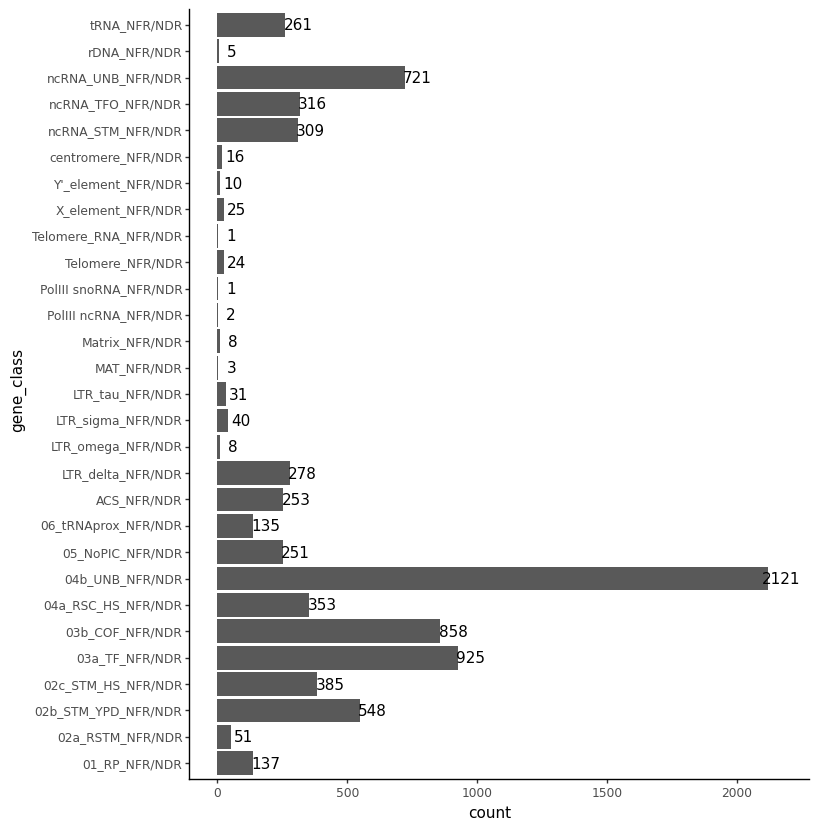

<ggplot: (8757312607485)>

In [11]:
#### Number of SGD other features per category
(p9.ggplot(ALL_NFR, p9.aes(x='gene_class'))
    + p9.geom_bar(stat='count')
    + p9.geom_text(
        p9.aes(x='gene_class', label=p9.after_stat('count')), 
        stat='count',
        nudge_y=50,
        va='center'
    )
    + p9.coord_flip()
    + p9.theme_classic()
    + p9.theme(figure_size=(8,10))
)

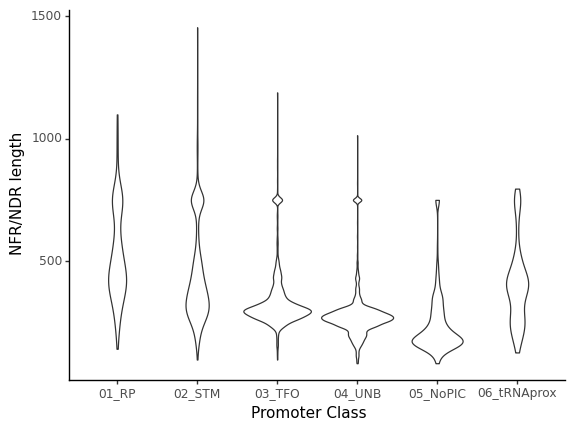

<ggplot: (8757312570658)>

In [12]:
#### Promoter length by category

(p9.ggplot(PROM_NFR, p9.aes(x='feature_type', y='NFR/NDR_Length'))
    + p9.geom_violin()
    + p9.labs(
        x='Promoter Class',
        y= 'NFR/NDR length'
    )
    + p9.theme_classic()
)

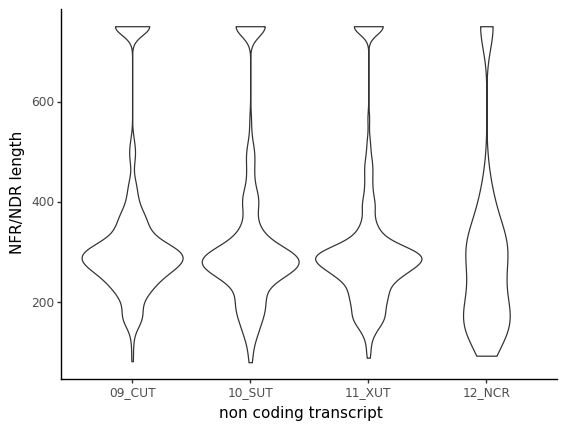

<ggplot: (8757312561951)>

In [13]:
(p9.ggplot(NC_R_NFR, p9.aes(x='feature_type', y='NFR/NDR_Length'))
    + p9.geom_violin()
    + p9.labs(
        x='non coding transcript',
        y= 'NFR/NDR length'
    )
    + p9.theme_classic()
)